# Top 3 Insights from Analysis of Human Capital Data

In this project, I will pretend to be a data analyst in an insurance company; the dataset I will be using is a dummy file which contains the details of all employees in the company. My goal of analysing this dataset is to find the top 3 insights which might benefit the company.

- [Importing of Libraries](#lib_imports)
- [Exploration of our Data](#data_exploration)
- [Data Cleaning](#data_cleaning)
- [Exploratory Data Analysis and Data Visualisation](#eda_dataviz)
- [Conclusion](#conclusion)

<a id='lib_imports'></a>

### Importing of Libraries

In [1]:
import pandas as pd                # Python Panel DataFrames
import numpy as np
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import datetime
import warnings
warnings.filterwarnings('ignore')
from dateutil.relativedelta import relativedelta
%matplotlib inline

### Reading in the data

In [2]:
df = pd.read_excel("insurance_dataset.xlsx")

In [3]:
df.head()

,Status,Name,Gender,Department,Salary (2019),Salary (2020),Birth date,Joining Date,Resign Date,Designation,Education Level,Employee Grouping,Nationality
0,Resigned,Ches Bonnell,Male,Business Development,88050,NaN,1999-11-18,2017-11-24,2019-06-23,Associate,Degree,Agencies,Singaporean
1,NaN,Garwin Peasegood,Female,Services,64809,68220.0,1969-09-14,2011-06-27,NaT,Associate,Degree,Direct Contract,Singaporean
2,NaN,Sidoney Yitzhok,Female,Product Management,115479,118440.0,2000-10-26,2011-09-20,NaT,Ass. Manager,Master,Direct Contract,Singaporean
3,NaN,Saunders Blumson,Male,Human Resources,54961,56370.0,1974-02-16,2015-12-11,NaT,Director,Diploma,Direct Contract,Singaporean
4,NaN,Gardy Grigorey,Female,Support,100665,107090.0,1981-01-16,2015-08-05,NaT,Director,Diploma,Permanent,Foreigner


In [4]:
df.tail()

,Status,Name,Gender,Department,Salary (2019),Salary (2020),Birth date,Joining Date,Resign Date,Designation,Education Level,Employee Grouping,Nationality
294,NaN,Durand Backhouse,Female,Legal,78396,83400.0,1969-09-10,2012-07-16,NaT,Vice President,Secondary,Agencies,PR
295,NaN,Wendel Malletratt,Male,Marketing,65969,67660.0,1974-11-16,2014-12-31,NaT,Director,Degree,Permanent,Foreigner
296,NaN,Shellysheldon Ellerman,Female,Accounting,33608,34470.0,1990-12-10,2010-05-31,NaT,Associate,Secondary,Agencies,Singaporean
297,Resigning,Emmeline Bestwerthick,Female,Services,36328,38240.0,1989-05-05,2018-04-05,NaT,Manager,Secondary,Permanent,Singaporean
298,Resigned,Marmaduke Worssam,Female,Sales,78380,78380.0,1995-05-29,2013-11-13,2018-10-24,Vice President,Degree,Agencies,Singaporean


<a id='data_exploration'></a>

### Exploration of our Data

In [5]:
df.shape

(299, 13)

In [6]:
df.dtypes

Status                       object
Name                         object
Gender                       object
Department                   object
Salary (2019)                 int64
Salary (2020)               float64
Birth date           datetime64[ns]
Joining Date         datetime64[ns]
Resign Date          datetime64[ns]
Designation                  object
Education Level              object
Employee Grouping            object
Nationality                  object
dtype: object

In [7]:
df['Salary (2019)'] = df['Salary (2019)'].astype(float)

In [8]:
# helps to check if Salary (2020) has the float datatype, and check for null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Status             42 non-null     object        
 1   Name               299 non-null    object        
 2   Gender             299 non-null    object        
 3   Department         299 non-null    object        
 4   Salary (2019)      299 non-null    float64       
 5   Salary (2020)      287 non-null    float64       
 6   Birth date         299 non-null    datetime64[ns]
 7   Joining Date       299 non-null    datetime64[ns]
 8   Resign Date        34 non-null     datetime64[ns]
 9   Designation        299 non-null    object        
 10  Education Level    299 non-null    object        
 11  Employee Grouping  299 non-null    object        
 12  Nationality        299 non-null    object        
dtypes: datetime64[ns](3), float64(2), object(8)
memory usage: 30.5+ K

We notice that the `Status`, `Salary (2020)` and `Resign Date` columns contain null values. We shall investigate these later.

In [9]:
df.describe()

,Salary (2019),Salary (2020)
count,299.000000,287.000000
mean,75445.210702,78207.073171
std,36787.902746,38101.310897
min,27056.000000,28330.000000
25%,49856.500000,51955.000000
50%,72842.000000,75320.000000
75%,96680.000000,99715.000000
max,420128.000000,430900.000000


To summarise the above table, the following row labels mean:

* **count**: the number of data entries for each column
* **mean**: the average annual salary of each respective year
* **std**: the standard deviation of the data entries in that column
* **min**: the minimum annual salary of each respective year
* **25%**: the salary at the (bottom) 25th percentage of the salaries in that column
* **50%**: the salary at the (bottom) 50th percentage of the salaries in that column
* **75%**: the salary at the (bottom) 75th percentage of the salaries in that column
* **max**: the maximum annual salary of each respective year


The annual salaries do not seem to be out of the ordinary (not unusually high or low).

<a id='data_cleaning'></a>

### Data Cleaning

#### Handling Missing Data

In [10]:
# alternative to df.info()
df.isnull().sum()

Status               257
Name                   0
Gender                 0
Department             0
Salary (2019)          0
Salary (2020)         12
Birth date             0
Joining Date           0
Resign Date          265
Designation            0
Education Level        0
Employee Grouping      0
Nationality            0
dtype: int64

As confirmed earlier, the `Status`, `Salary (2020)` and `Resign Date` columns have missing entries.

However, 257 out of 299 entries of the `Status` column are null; this is an overwhelming majority of the data. This implies that these employees are still working in the company at the time the data was collected. To further support this assertion, majority of the employees do not seem to have a resignation date, which is normal since most of them are still working in the company. 

Still, there seem to be 8 employees with a filled `Status`, but are missing a `Resign Date`, which I suspect might be because they are resigning, but have not yet resigned.

Next, we observe that the `Salary (2020)` of 12 employees are missing. This part is tricky as we do not know the exact reason for the missing data, but we might be able to find out why upon further exploration.

In [11]:
# Employees with a status but no resign date

# creating conditions to filter out the entries which fulfil the above requirements
bool_null_resign = pd.isnull(df['Resign Date'])
bool_status = pd.notnull(df['Status'])

status_no_resign = df[bool_null_resign & bool_status] # note that "and" doesn't work, only & does
status_no_resign

,Status,Name,Gender,Department,Salary (2019),Salary (2020),Birth date,Joining Date,Resign Date,Designation,Education Level,Employee Grouping,Nationality
40,Resigning,Mendel Gentsch,Male,Human Resources,27622.0,28330.0,1994-10-11,2016-07-24,NaT,Managing Director,Master,Direct Contract,PR
41,Resigning,Alfred Peplay,Female,Sales,57551.0,60580.0,1977-06-08,2011-12-22,NaT,Managing Director,PHD,Permanent,PR
54,Resigning,Trace Sidsaff,Female,Business Development,48640.0,51200.0,1997-05-31,2010-04-29,NaT,Vice President,Secondary,Agencies,PR
97,Resigning,Pedro St. Hill,Male,Legal,95000.0,100000.0,1971-11-16,2018-09-29,NaT,Ass. Manager,PHD,Permanent,Foreigner
114,Resigning,Mile Swindley,Male,Support,53430.0,54800.0,1998-10-18,2014-09-07,NaT,Associate,Diploma,Permanent,Foreigner
168,Resigning,Crawford Scad,Male,Accounting,72880.0,72880.0,1995-04-10,2018-10-03,NaT,Managing Director,Diploma,Permanent,Singaporean
277,Resigning,Cindee Saice,Female,Engineering,100776.0,103360.0,1975-03-21,2017-12-28,NaT,Vice President,Diploma,Direct Contract,PR
297,Resigning,Emmeline Bestwerthick,Female,Services,36328.0,38240.0,1989-05-05,2018-04-05,NaT,Manager,Secondary,Permanent,Singaporean


The above confirms our hypothesis that 8 employees are resigning, but not yet resigned, which explains the discrepancy we mentioned earlier in the dataset.

Next, we investigate why the `Salary (2020)` of 12 employees are missing.

In [12]:
bool_missing_salary_2020 = pd.isnull(df['Salary (2020)'])

missing_salary_2020 = df[bool_missing_salary_2020]
missing_salary_2020

,Status,Name,Gender,Department,Salary (2019),Salary (2020),Birth date,Joining Date,Resign Date,Designation,Education Level,Employee Grouping,Nationality
0,Resigned,Ches Bonnell,Male,Business Development,88050.0,NaN,1999-11-18,2017-11-24,2019-06-23,Associate,Degree,Agencies,Singaporean
11,Resigned,Stefa Eggleston,Male,Human Resources,83961.0,NaN,1972-12-18,2016-12-02,2019-04-30,Director,Secondary,Agencies,Foreigner
14,Resigned,Axel Grigaut,Male,Business Development,104133.0,NaN,1985-09-19,2016-10-25,2019-10-25,Associate,Degree,Permanent,Foreigner
15,Resigned,Timmi Durran,Male,Marketing,68430.0,NaN,1993-04-09,2015-05-28,2019-12-10,Manager,Degree,Direct Contract,Foreigner
22,Resigned,Tiffani Mecozzi,Female,Support,113763.0,NaN,2000-10-07,2015-12-28,2019-12-14,Vice President,Master,Agencies,Singaporean
26,Resigned,Rafaelita Blaksland,Female,Engineering,106431.0,NaN,1970-07-25,2018-11-14,2019-04-24,Managing Director,Degree,Agencies,Foreigner
91,Resigned,Daryn Kniveton,Female,Support,105680.0,NaN,1994-05-11,2019-11-20,2019-06-18,Manager,Secondary,Direct Contract,Singaporean
98,Resigned,Tris Hynard,Female,Engineering,27262.0,NaN,2000-08-05,2010-05-04,2019-04-29,Ass. Vice President,Secondary,Permanent,Foreigner
115,Resigned,Garwood Penhale,Female,Product Management,96640.0,NaN,1993-01-26,2011-08-23,2019-07-04,Ass. Manager,Master,Permanent,Singaporean
134,Resigned,Juditha Hatherleigh,Female,Training,33959.0,NaN,1994-08-15,2016-04-30,2019-10-01,Associate,Diploma,Permanent,Singaporean


By observation, we notice that the employees who do not have a salary in 2020 have a few features in common:
* they have already resigned
* their resign year was in 2019 

We would ordinarily make the assumption that those who resigned **before 2019 and in 2019** would have not have a salary in 2020.

However, when we examined the last 5 entries of the dataset earlier, we observed that in the very last entry, the employee's resignation year was in *2018*, the corresponding entries for `Salary (2019)` and `Salary (2020)` were filled.

This is most likely because as the employee resigned before 2019, the latest salary of the employee was used to fill in these two columns. The same would apply for the rest of the employees who resigned before Year 2019. 

So this means that those who resigned **before 2019** has their corresponding `Salary (2019)` and `Salary (2020)` entries filled with their last known salary, but those who resigned **in 2019** only has their `Salary (2019)` entry filled.

What we could do for the 12 missing values in `Salary (2020)` is to do imputation (substitute missing values) based on `Salary (2019)`, which is similar to their approach of imputing `Salary (2019)` and `Salary (2020)` with the last known salary of the employees which resigned before 2019.

In [13]:
df['Salary (2020)'] = df['Salary (2020)'].fillna(df['Salary (2019)'])

In [14]:
df['Salary (2020)'].isnull().sum()

0

In [15]:
# check if imputation was done correctly
df.iloc[[0, 11, 14]]

,Status,Name,Gender,Department,Salary (2019),Salary (2020),Birth date,Joining Date,Resign Date,Designation,Education Level,Employee Grouping,Nationality
0,Resigned,Ches Bonnell,Male,Business Development,88050.0,88050.0,1999-11-18,2017-11-24,2019-06-23,Associate,Degree,Agencies,Singaporean
11,Resigned,Stefa Eggleston,Male,Human Resources,83961.0,83961.0,1972-12-18,2016-12-02,2019-04-30,Director,Secondary,Agencies,Foreigner
14,Resigned,Axel Grigaut,Male,Business Development,104133.0,104133.0,1985-09-19,2016-10-25,2019-10-25,Associate,Degree,Permanent,Foreigner


Next, we can check for any duplicate entries in the dataset.

#### Handling Duplicate Data

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(299, 13)

The number of rows (employees) still remains the same after checking for duplicates. This means that there are no duplicate entries in the dataset.

#### Adding Additional Columns

In [18]:
# number of months each employee has worked in the company
df['months_in_company'] = df['Resign Date'] - df['Joining Date']
df['months_in_company'] = round(df['months_in_company'] / np.timedelta64(1, 'M'), 0)
df['months_in_company'][0:5]

0    19.0
1     NaN
2     NaN
3     NaN
4     NaN
Name: months_in_company, dtype: float64

In [19]:
# age of each employee when they joined
df['age_on_joining'] = df['Joining Date'] - df['Birth date']
df['age_on_joining'] = round(df['age_on_joining'] / np.timedelta64(1, 'Y'), 0)
df['age_on_joining'][0:5]

0    18.0
1    42.0
2    11.0
3    42.0
4    35.0
Name: age_on_joining, dtype: float64

In [20]:
# age of each employee when they resigned
df['age_on_resign'] = df['Resign Date'] - df['Birth date']
df['age_on_resign'] = round(df['age_on_resign'] / np.timedelta64(1, 'Y'), 0)
df['age_on_resign'][0:5]

0    20.0
1     NaN
2     NaN
3     NaN
4     NaN
Name: age_on_resign, dtype: float64

In [21]:
df.head()

,Status,Name,Gender,Department,Salary (2019),Salary (2020),Birth date,Joining Date,Resign Date,Designation,Education Level,Employee Grouping,Nationality,months_in_company,age_on_joining,age_on_resign
0,Resigned,Ches Bonnell,Male,Business Development,88050.0,88050.0,1999-11-18,2017-11-24,2019-06-23,Associate,Degree,Agencies,Singaporean,19.0,18.0,20.0
1,NaN,Garwin Peasegood,Female,Services,64809.0,68220.0,1969-09-14,2011-06-27,NaT,Associate,Degree,Direct Contract,Singaporean,NaN,42.0,NaN
2,NaN,Sidoney Yitzhok,Female,Product Management,115479.0,118440.0,2000-10-26,2011-09-20,NaT,Ass. Manager,Master,Direct Contract,Singaporean,NaN,11.0,NaN
3,NaN,Saunders Blumson,Male,Human Resources,54961.0,56370.0,1974-02-16,2015-12-11,NaT,Director,Diploma,Direct Contract,Singaporean,NaN,42.0,NaN
4,NaN,Gardy Grigorey,Female,Support,100665.0,107090.0,1981-01-16,2015-08-05,NaT,Director,Diploma,Permanent,Foreigner,NaN,35.0,NaN


However, we see that the third entry (labelled with the row label 2) indicates that the employee joined the workplace at the age of eleven years old, which seems to be really unusual. Let's check for any suspect entries by filtering out the employees who joined the company at a very young age, say 16 and below.

In [22]:
under_16 = df[df['age_on_joining'] < 16]
under_16.shape

(30, 16)

In [23]:
under_16.head()

,Status,Name,Gender,Department,Salary (2019),Salary (2020),Birth date,Joining Date,Resign Date,Designation,Education Level,Employee Grouping,Nationality,months_in_company,age_on_joining,age_on_resign
2,NaN,Sidoney Yitzhok,Female,Product Management,115479.0,118440.0,2000-10-26,2011-09-20,NaT,Ass. Manager,Master,Direct Contract,Singaporean,NaN,11.0,NaN
19,NaN,Elliot Tuplin,Female,Legal,43417.0,44530.0,1999-09-14,2011-11-29,NaT,Associate,PHD,Agencies,PR,NaN,12.0,NaN
20,NaN,Lion Adcock,Female,Human Resources,60525.0,63710.0,1995-02-26,2010-04-07,NaT,Managing Director,Master,Agencies,Singaporean,NaN,15.0,NaN
22,Resigned,Tiffani Mecozzi,Female,Support,113763.0,113763.0,2000-10-07,2015-12-28,2019-12-14,Vice President,Master,Agencies,Singaporean,48.0,15.0,19.0
27,Resigned,Brit Hamnett,Male,Business Development,71763.0,75540.0,1998-09-02,2012-04-19,2017-12-17,Managing Director,Secondary,Agencies,PR,68.0,14.0,19.0


In [24]:
under_16.tail()

,Status,Name,Gender,Department,Salary (2019),Salary (2020),Birth date,Joining Date,Resign Date,Designation,Education Level,Employee Grouping,Nationality,months_in_company,age_on_joining,age_on_resign
266,NaN,Andrea Becker,Female,Support,45006.0,46160.0,2001-11-04,2014-10-17,NaT,Manager,Diploma,Permanent,PR,NaN,13.0,NaN
269,NaN,Carmel Pancoust,Female,Legal,112377.0,119550.0,2000-04-07,2012-11-08,NaT,Ass. Vice President,Diploma,Agencies,Foreigner,NaN,13.0,NaN
275,NaN,Eddy Stolze,Male,Marketing,44894.0,47760.0,1999-05-04,2013-07-06,NaT,Vice President,Degree,Agencies,Foreigner,NaN,14.0,NaN
281,Resigned,Jobey Boneham,Female,Accounting,74010.0,74010.0,2000-12-17,2010-06-05,2014-09-06,Managing Director,Master,Permanent,Singaporean,51.0,9.0,14.0
292,NaN,Grady Rochelle,Female,Training,67431.0,69160.0,2000-02-27,2010-12-08,NaT,Managing Director,Secondary,Permanent,Foreigner,NaN,11.0,NaN


In [25]:
30/299

0.10033444816053512

We see that these 30 rows consist of about 10% of the employees in the company. Given that we have not that many entries (below 300), we could lose a significant amount of data if we choose to remove too many columns. 

However, according to the [Ministry of Manpower](https://www.mom.gov.sg/employment-practices/young-persons-and-children), young persons aged from 13 to 16 are permitted to work in a non-industrial area (the Human Capital Department is non-industrial), which means that those who are under 13 in this dataset are implied to have worked illegally, which should not be the case. 

In addition, even some who joined when they were 13 to 16 years of age have a degree or even a master. What we are not sure of is whether their education level recorded when they joined the company, or whether they pursued further education while they were still working. Since several entries reflect this phenomenon (which should be relatively unlikely based on the lives of most Singaporeans), I would make the assumption that the data collected was corrupted.

The corrupted data would be difficult to fix, hence I err on the side of caution and would opt to remove entries whose `age_of_joining` is below 16; in addition, 10% of the dataset is not too big a loss.

In [26]:
df = df[df['age_on_joining'] >= 16]

In [27]:
df.shape

(269, 16)

For further data cleaning purposes, we should check if any of the entries have an incorrect `months_in_company` / `age_on_joining` / `age_on_resign` entry (e.g. negative values).

In [28]:
df[df['months_in_company'] < 0].shape

(2, 16)

In [29]:
df[df['age_on_joining'] < 0].shape

(0, 16)

In [30]:
"""
Logically, the age of joining should occur before the age of resignation (though not always in this dataset).
If we remove those who joined below 16, those who resigned are unlikely to be below 16.
But we shouldn't need to further filter those who resign before 16 because we also check if
there are any negative entries in the 'months_in_company' column, and we have already removed those who joined below 16.

"""

df[df['age_on_resign'] < 0].shape

(0, 16)

We observe that there are 2 entries with a resign date that is before the date they join the company. We cannot do much about the corrupted data, so we should remove these 2 entries as well.

In [31]:
df = df[(df['months_in_company'] >= 0) | (df['months_in_company'].isnull())]

In [32]:
df.describe()

,Salary (2019),Salary (2020),months_in_company,age_on_joining,age_on_resign
count,267.000000,267.000000,26.000000,267.000000,26.000000
mean,75628.284644,78495.737828,35.500000,31.966292,34.307692
std,37671.961571,38697.907226,26.327552,8.942317,9.120391
min,27056.000000,28330.000000,4.000000,16.000000,20.000000
25%,50324.500000,52305.000000,16.000000,25.000000,27.000000
50%,73827.000000,76226.000000,32.000000,32.000000,34.000000
75%,96367.000000,99575.000000,50.750000,39.500000,42.750000
max,420128.000000,430900.000000,94.000000,53.000000,49.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 0 to 298
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Status             33 non-null     object        
 1   Name               267 non-null    object        
 2   Gender             267 non-null    object        
 3   Department         267 non-null    object        
 4   Salary (2019)      267 non-null    float64       
 5   Salary (2020)      267 non-null    float64       
 6   Birth date         267 non-null    datetime64[ns]
 7   Joining Date       267 non-null    datetime64[ns]
 8   Resign Date        26 non-null     datetime64[ns]
 9   Designation        267 non-null    object        
 10  Education Level    267 non-null    object        
 11  Employee Grouping  267 non-null    object        
 12  Nationality        267 non-null    object        
 13  months_in_company  26 non-null     float64       
 14  age_on_joi

<a id='eda_dataviz'></a>

### Exploratory Data Analysis and Data Visualisation

Examples of insights which might benefit us would be those that might help to reduce the employee resignation rate in this company.
A high employee retention rate would mean less disruption to the Human Capital Department, and also indicates a likely healthier work environment. 

We can start off by asking some surface level questions which might help:

1. Is there anything in common among those who resigned / are resigning? 
2. Is there any particular `Department` with a high resignation rate / count?

It also might help to benefit the Human Capital Department if we discover insights that might help to build a more inclusive environment.

1. Is there a large disparity of salary by any variables such as `Gender` / `Nationality` / `Employee Grouping`?

#### Analysis of Resignations in Company

In [34]:
df.columns

Index(['Status', 'Name', 'Gender', 'Department', 'Salary (2019)',
       'Salary (2020)', 'Birth date', 'Joining Date', 'Resign Date',
       'Designation', 'Education Level', 'Employee Grouping', 'Nationality',
       'months_in_company', 'age_on_joining', 'age_on_resign'],
      dtype='object')

Before we start, we notice that who are resigning (but have not resigned yet) do not have a date of resignation, which would mean the number of months they worked in the company is unknown. For simplicity, we can set their dates to a recent one, e.g. 19 July 2020, and find a good approximation of the months worked.

The above should be a safe assumption because at the very least, they should resign by 2020.

In [35]:
# employees who have resigned / are resigning
resigns = df[df['Status'].notnull()]
resigns.shape

(33, 16)

In [36]:
resigns['Resign Date'] = resigns['Resign Date'].fillna(datetime.datetime(2020, 7, 19))

In [37]:
resigns['age_on_resign'] = resigns['Resign Date'] - resigns['Birth date']
resigns['age_on_resign'] = round(resigns['age_on_resign'] / np.timedelta64(1, 'Y'), 0)
resigns['age_on_resign'][0:5]

0     20.0
10    34.0
11    46.0
14    34.0
15    27.0
Name: age_on_resign, dtype: float64

In [38]:
resigns['months_in_company'] = resigns['Resign Date'] - resigns['Joining Date']
resigns['months_in_company'] = round(resigns['months_in_company'] / np.timedelta64(1, 'M'), 0)
resigns['months_in_company'][0:5]

0     19.0
10    16.0
11    29.0
14    36.0
15    54.0
Name: months_in_company, dtype: float64

In [39]:
print(resigns['Resign Date'].min())
print(resigns['Resign Date'].max())

2013-05-06 00:00:00
2020-07-19 00:00:00


In [40]:
resigns['resign_year'] = resigns['Resign Date'].apply(lambda x: x.year)
resigns['resign_year'].head()

0     2019
10    2020
11    2019
14    2019
15    2019
Name: resign_year, dtype: int64

In [41]:
resign_by_year = resigns.groupby('resign_year')
resign_by_year = resign_by_year['resign_year'].count()
resign_by_year

resign_year
2013    1
2014    1
2015    4
2016    2
2017    4
2018    3
2019    9
2020    9
Name: resign_year, dtype: int64

Text(0, 0.5, 'Number of Resignations')

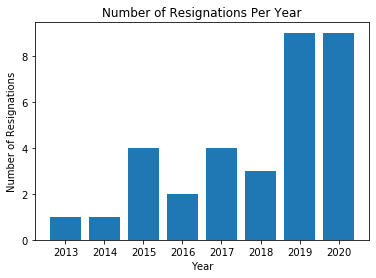

In [42]:
# create figure and axis
fig, ax = plt.subplots()
resign_by_year_2 = resigns['resign_year'].value_counts()

# get x and y data
year = resign_by_year_2.index
num_resigns_year = resign_by_year_2.values

# create bar chart
ax.bar(year, num_resigns_year)

# set titles and labels
ax.set_title('Number of Resignations Per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Resignations')

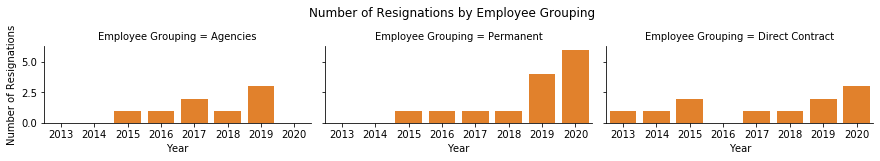

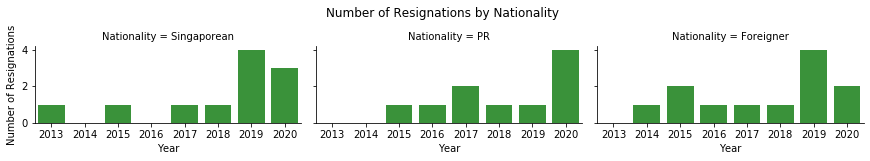

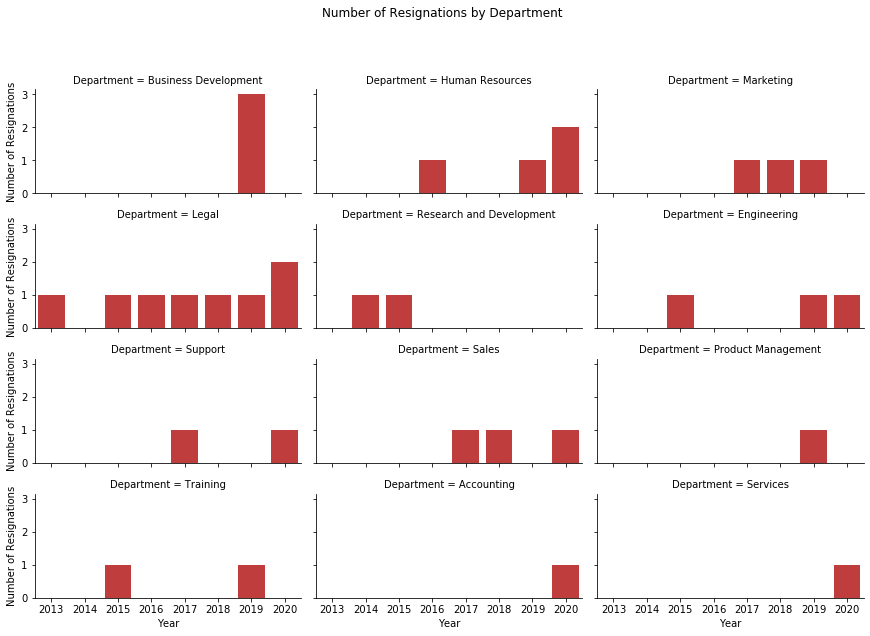

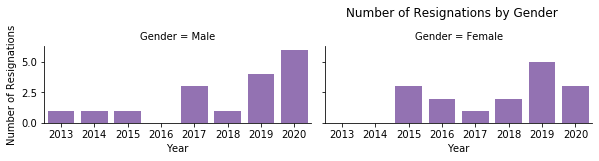

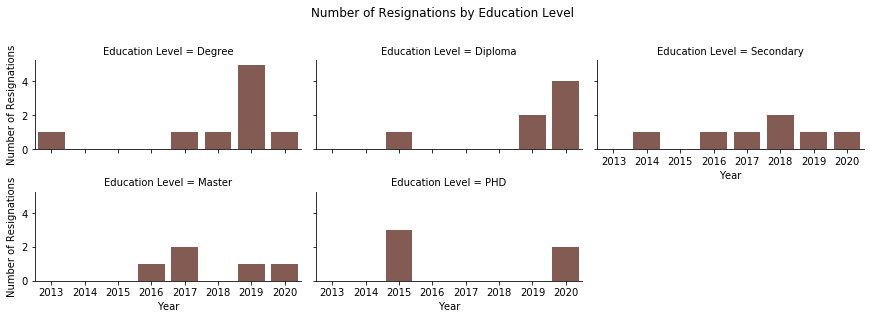

In [43]:
features = ['Employee Grouping', 'Nationality', 'Department', 'Gender', 'Education Level']
count = 1

# plots number of resigned for each feature
for feature in features:
    g = sns.catplot(x = 'resign_year', col = feature, data = resigns, color = 'C' + str(count), kind='count', col_wrap= 3, aspect= 2, height = 2)
    g.set_axis_labels("Year", "Number of Resignations")
    g.fig.suptitle('Number of Resignations by ' + feature, y=1.1)
    count += 1

We know that as long as the company's environment is good, the `Education Level` or the `Employee Grouping` of each employee is unlikely to affect whether they would resign. 

While it might be possible for discriminatory practices (by `Gender` or `Nationality`) to influence whether one resigns, at a surface glance, there does not seem to be significantly more resignations in any particular party. Usually, the `Department` culture and its practices (or the company's) can be a significant contributing factor of one's resignation.

However, we should also take into account the number of months each employee worked in the company, instead of only the number of resignations by department. A small median `months_in_company` value is a possible indication that employees might not find enough incentives to work in the company for longer (though there are other reasons such as finding better job opportunities elsewhere).

Let's examine the `Gender`, `Nationality` and `Department` features a little deeper.

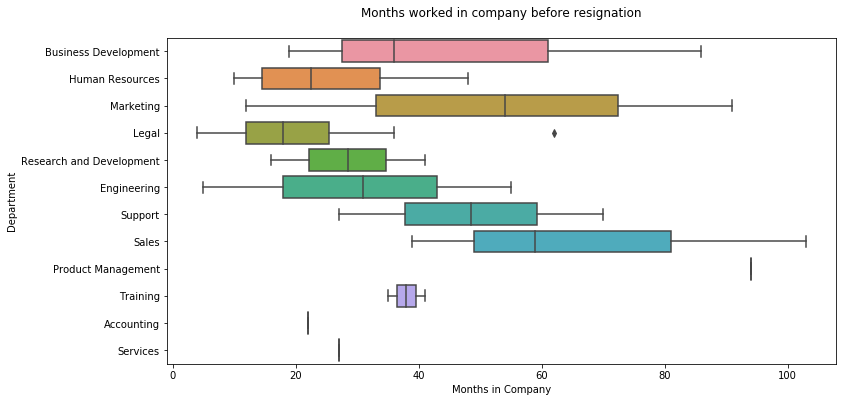

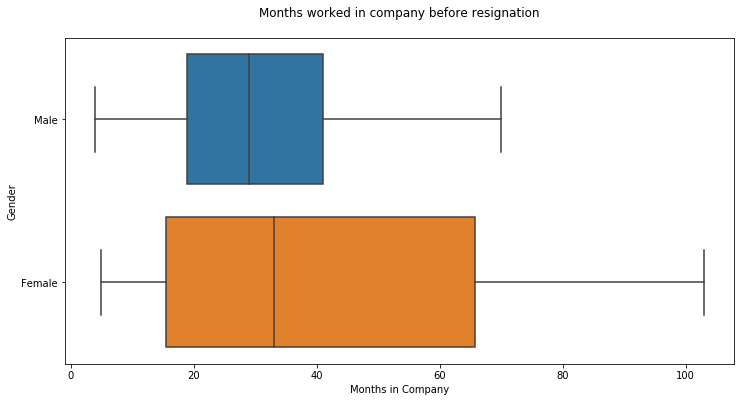

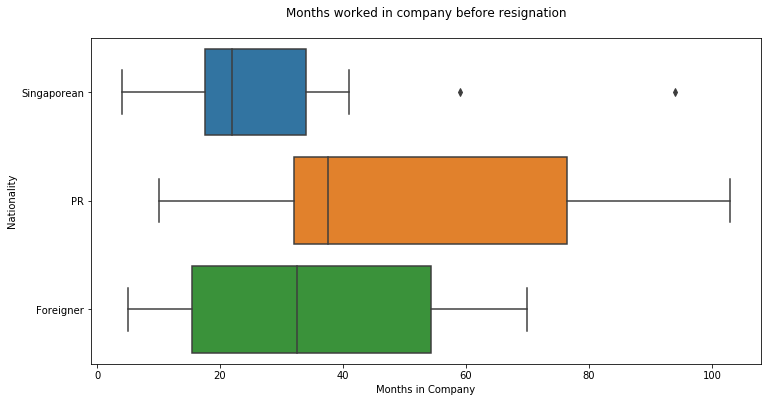

In [44]:
features_close = ['Department', 'Gender', 'Nationality']

for feature in features_close:
    fig = plt.figure(figsize=(12,6))
    ax = fig.gca()
    ax = sns.boxplot(data = resigns, y= resigns[feature], x= resigns['months_in_company'])
    
    ax.set_title('Months worked in company before resignation\n')
    ax.set_xlabel('Months in Company')
    plt.show()

There does not seem to be a significant difference in the median number of months by `Gender`, but there are noticeable differences in the `Department` and `Nationality` features. 

For instance, going by `Department`, almost every employee who resigned from the *Legal* department worked less than 40 months in the company, compared to other departments whose median is more than 40 months.

In addition, looking at `Nationality`, Singaporeans seem to stay a significantly shorter amount of time in the company compared to PRs and Foreigners.

##### Analysis by Department

In [45]:
# df is used instead of resigns, in case there are any departments which do not have resignations
df['Department'].unique()

array(['Business Development', 'Services', 'Human Resources', 'Support',
       'Training', 'Research and Development', 'Engineering',
       'Accounting', 'Marketing', 'Legal', 'Sales', 'Product Management'],
      dtype=object)

In [46]:
resigns['Department'].value_counts()

Legal                       8
Human Resources             4
Marketing                   3
Sales                       3
Engineering                 3
Business Development        3
Support                     2
Research and Development    2
Training                    2
Product Management          1
Services                    1
Accounting                  1
Name: Department, dtype: int64

Though some departments have more resignations than others, we should compare this to how many employees were in each department (including those already resigned / are resigning) to have a better idea of the turnover rates in each department.

For instance, if 8 out of 1,000 total hired within a department resign, it should not be too alarming, but if it were 10 out of 15, this might be an indication of a high turnover.

In [47]:
df['Department'].value_counts()

Legal                       29
Engineering                 27
Sales                       27
Marketing                   27
Services                    27
Human Resources             23
Support                     22
Accounting                  19
Training                    19
Business Development        17
Research and Development    15
Product Management          15
Name: Department, dtype: int64

In [48]:
# percentage of resignations from each department
resigned_perc = round(resigns['Department'].value_counts() * 100 / df['Department'].value_counts(), 2)
resigned_perc.sort_values(ascending=False)

Legal                       27.59
Business Development        17.65
Human Resources             17.39
Research and Development    13.33
Sales                       11.11
Marketing                   11.11
Engineering                 11.11
Training                    10.53
Support                      9.09
Product Management           6.67
Accounting                   5.26
Services                     3.70
Name: Department, dtype: float64

Looking at the percentage of resignations from each department, initial thoughts that come to mind would be that the *Legal*, *Business Development* and *Human Resources* departments should be of concern, particularly since the *Legal* department since the median number of months an employee stayed was below 40.

However, as mentioned earlier, there are many factors to one's resignation; examples include personal circumstances, pay, job scope (depending on the `Designation`), and better job opportunities. In addition, since the dataset that we used has a small size, we should also be careful of immediately concluding that the other departments are "better" than the *Legal* department. 

Still, one should still not neglect both the lower stay period and the higher turnover rate in the *Legal* department relative to other departments; it might be worth investigating further.

One possible reason could be because of the pay they might be receiving, but this can be easily reviewed by plotting a boxplot that shows the `Salary (2020)` of each department.

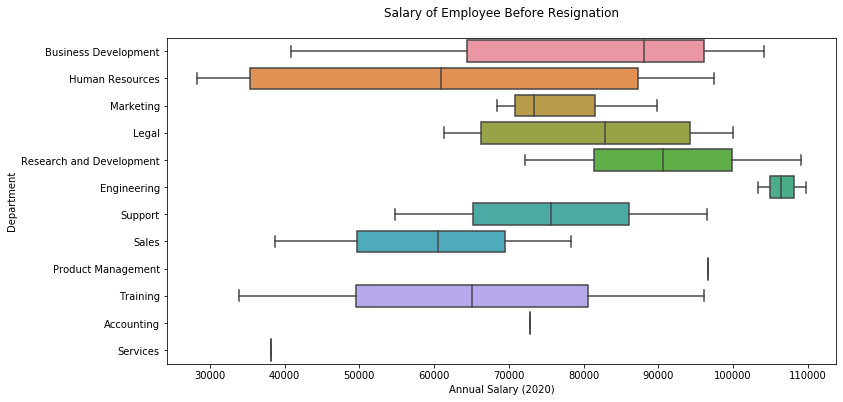

In [49]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
ax = sns.boxplot(data = resigns, y= resigns['Department'], x= resigns['Salary (2020)'])
    
ax.set_title('Salary of Employee Before Resignation\n')
ax.set_xlabel('Annual Salary (2020)')
plt.show()

However, it does not seem as if the employees in the *Legal* department is receiving "low" pay, relative to other departments. The company should hence examine the implemented policies / incentives within the department or gather feedback from its employees. 

##### Analysis by Nationality

In [50]:
resigns['Nationality'].value_counts()

Foreigner      12
Singaporean    11
PR             10
Name: Nationality, dtype: int64

In [51]:
df['Nationality'].value_counts()

Singaporean    98
PR             86
Foreigner      83
Name: Nationality, dtype: int64

In [52]:
# percentage of resignations from each nationality
resigned_perc = round(resigns['Nationality'].value_counts() * 100 / df['Nationality'].value_counts(), 2)
resigned_perc.sort_values(ascending=False)

Foreigner      14.46
PR             11.63
Singaporean    11.22
Name: Nationality, dtype: float64

Despite our previous observation of how Singaporeans tend to stay for a shorter period of time relative to employees of other nationalities, the number of resignations from employees of each nationality is near the same. In addition, the proportion of those who resigned against the total hired is not much different as well, unlike the earlier analysis by `Department`.

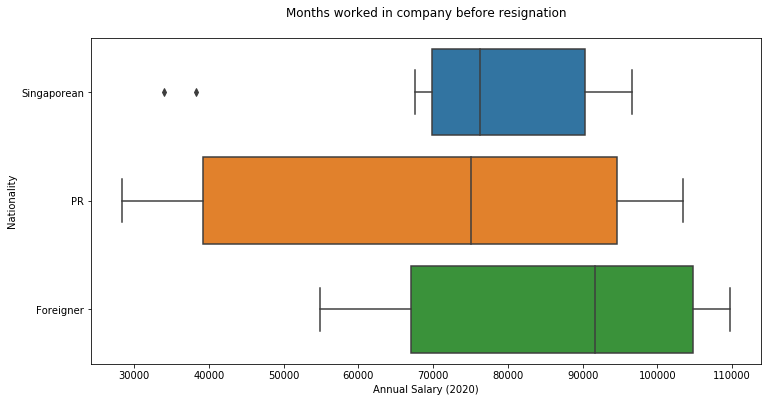

In [53]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
ax = sns.boxplot(data = resigns, y= resigns['Nationality'], x= resigns['Salary (2020)'])
    
ax.set_title('Months worked in company before resignation\n')
ax.set_xlabel('Annual Salary (2020)')
plt.show()

From this boxplot, although the Annual Salary (2020) of Singaporeans seem to be relatively "stable" based on the 25th percentile and the 75th percentile (the two ends of the box), those who resigned seem to stay for a shorter period of time compared to those with a PR or Foreigner nationality.

This could possibly be because of better job opportunities that some PRs or Foreigners might not have access to, therefore the company should review the incentives they offer to Singaporeans if they would like to retain local manpower. The company could also consider doing the same for PRs / Foreigners as well to retain manpower as a whole.

##### Analysis by Gender

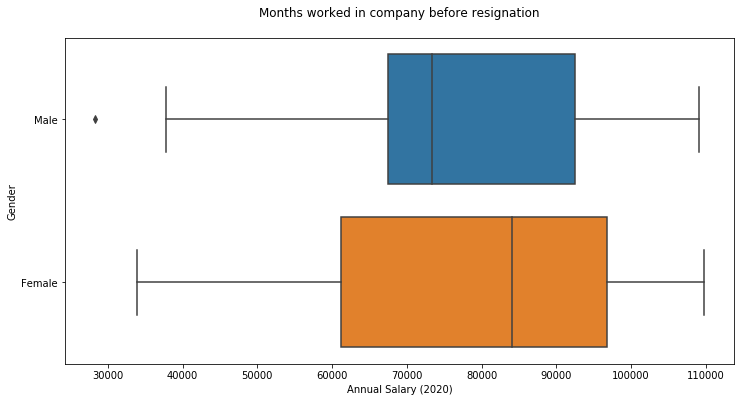

In [54]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()
ax = sns.boxplot(data = resigns, y= resigns['Gender'], x= resigns['Salary (2020)'])
    
ax.set_title('Months worked in company before resignation\n')
ax.set_xlabel('Annual Salary (2020)')
plt.show()

There is no significant difference in wages by gender; in addition, as observed by the earlier bar chart, the number of males and females who resigned are approximately equal. Therefore, there doesn't seem to be any gender issues within the company. 

##### Analysis by Age of Resignation

We would like to determine if there is something in common among those who resigned; possible reasons could include them having a lower salary or having a younger age (meaning more job opportunities / chances to take risks).

(array([13.,  9., 11.]),
 array([20.        , 29.66666667, 39.33333333, 49.        ]),
 <a list of 3 Patch objects>)

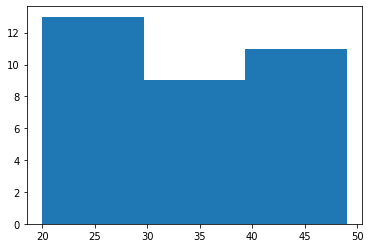

In [55]:
# histogram which shows the number of resignations by age group
plt.hist(resigns['age_on_resign'], bins=3)

Contrary to what was initially expected, though there are slightly more young people who resigned, the number of people from each of the other age ranges (30-39, 40-49) are not too far off either. 

* 20 to 29: 13 resignations
* 30 to 39: 9 resignations
* 40 to 49: 11 resignations

This means that better job opportunities might not be that significant of a reason for the younger employees leaving (though better job opportunities as Singaporean citizens might be a different story). Therefore, it might be a good idea to review the company's culture and practices as a whole to reduce the number of resignations.

<a id='conclusion'></a>

### Conclusion

Based on the above analysis, the top 3 insights could possibly be:

1. It does not seem that there are any discriminatory practices within the company (e.g. in terms of `Gender` or `Nationality`, based on salary or the number of each respective category in the company). To reduce the number of resignations from all age groups, the company's cultures / practices / policies should be reviewed. 

2. The *Legal* `Department` in particular should be paid more attention to: the number of months the employees remain in the department is significantly shorter relative to the other departments, and the number of resignations are higher (though this information should be considered carefully as the dataset is small).

3. Singaporeans tend to have a much shorter stay in the company compared to PRs / Foreigners. Therefore, the company should review its policies / incentives to encourage them to continue to stay; it might be possible that the Singaporeans are being swayed by better job opportunities being offered which might not be as accessible to PRs / Foreigners.